In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


In [5]:
heart = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


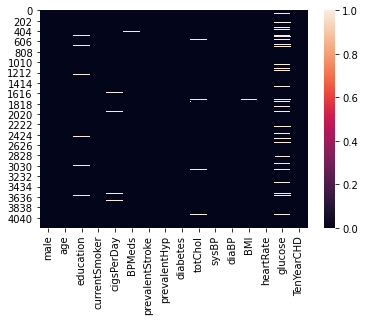

In [7]:
sns.heatmap(heart.isnull())

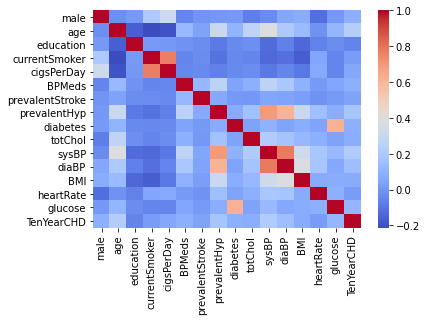

In [17]:
sns.heatmap(heart.corr(), cmap='coolwarm')

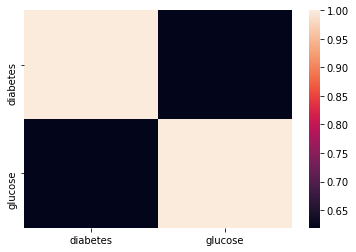

In [20]:
sns.heatmap(heart[['diabetes', 'glucose']].corr(), )

In [8]:
diab = heart[heart['diabetes'] == 1]['glucose'].mean()
no_diab = heart[heart['diabetes'] == 0]['glucose'].mean()
def fill(cols):
    if pd.isnull(cols[1]):
        if cols[0] == 1:
            return diab
        else:
            return no_diab
    else:
        return cols[1]
            
heart['glucose'] = heart[['diabetes', 'glucose']].apply(fill, axis=1)

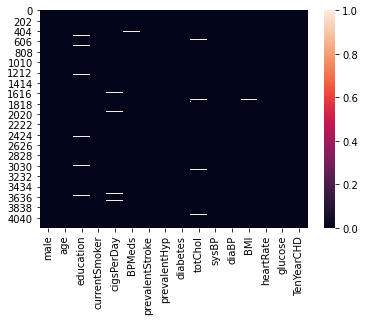

In [9]:
sns.heatmap(heart.isnull())

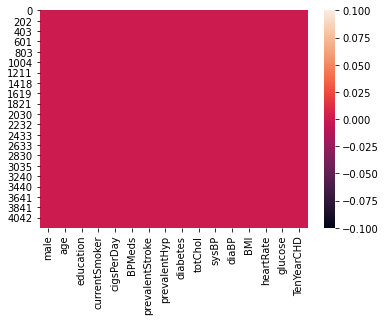

In [10]:
heart.dropna(axis=0, inplace=True)
sns.heatmap(heart.isnull())

In [14]:
logmodel= LogisticRegression()
X = heart.drop('TenYearCHD', axis=1)
y = heart['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=102)

X_train_scale = preprocessing.scale(X_train)
X_test_scale = preprocessing.scale(X_test)
logmodel.fit(X_train_scale, y_train)

predictions = logmodel.predict(X_test_scale)
coefficient = pd.DataFrame(np.transpose(logmodel.coef_), X_train.columns, columns=['Coefficient'])
print('classification Report:')
print(classification_report(y_test, predictions))

classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1016
           1       0.75      0.07      0.12       181

    accuracy                           0.86      1197
   macro avg       0.80      0.53      0.52      1197
weighted avg       0.84      0.86      0.80      1197



In [16]:
print(confusion_matrix(y_test, predictions))

[[1012    4]
 [ 169   12]]
